In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import geopandas as gpd


In [2]:
# map_df = gpd.read_file('data/geo-data/countries.shp')
world_df = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
tracks_df = pd.read_csv('data/SpotifyFeatures.csv')

country_codes_df = pd.read_csv('data/geo-data/country_codes_a2_a3.csv')
country_codes_df.rename(index=str, columns={'Alpha-3 code': 'iso_a3', 'Alpha-2 code': 'iso_a2'}, inplace=True)


world_df = world_df.merge(country_codes_df)
world_df.info()
# world_df.head(5)
tracks_df.head(5)

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 182 entries, 0 to 181
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   pop_est              182 non-null    int64   
 1   continent            182 non-null    object  
 2   name                 182 non-null    object  
 3   iso_a3               182 non-null    object  
 4   gdp_md_est           182 non-null    float64 
 5   geometry             182 non-null    geometry
 6   Country              182 non-null    object  
 7   iso_a2               181 non-null    object  
 8   Numeric code         182 non-null    int64   
 9   Latitude (average)   182 non-null    float64 
 10  Longitude (average)  182 non-null    float64 
dtypes: float64(3), geometry(1), int64(2), object(5)
memory usage: 17.1+ KB


,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [3]:
birthplace_df = pd.read_csv('data/artist_birthplace.csv')
birthplace_df = birthplace_df.rename(columns={'name':'artist_name'})
# birthplace_df.info()
birthplace_df.head(5)

,Unnamed: 0,artist_name,birth_country
0,0,Henri Salvador,FR
1,1,Joseph Williams,US
2,2,Fabien Nataf,FR
3,3,Laura Mayne,FR
4,4,Chorus,PL


In [4]:
tracks_df = tracks_df.merge(birthplace_df)


In [5]:
birthplace_counts_df = birthplace_df.groupby('birth_country').count().drop(columns='Unnamed: 0').reset_index().rename(columns={'artist_name':'artist_count', 'birth_country': 'iso_a2'})
# birthplace_counts_df.rename({'Unnamed':'artist_count'})
birthplace_counts_df.head(5)

,iso_a2,artist_count
0,AG,1
1,AM,3
2,AO,1
3,AR,55
4,AS,1


In [6]:
metrics_df = tracks_df[['birth_country', 'tempo', 'danceability', 'energy', 'valence']]
metrics_df.head(5)

,birth_country,tempo,danceability,energy,valence
0,FR,166.969,0.389,0.9100,0.814
1,FR,171.758,0.240,0.3260,0.227
2,FR,87.479,0.578,0.0948,0.358
3,FR,71.633,0.451,0.4910,0.516
4,FR,127.999,0.704,0.8040,0.836


In [7]:
metric_means_df = metrics_df.groupby('birth_country').mean().reset_index()
metric_means_df.head(10)
metric_means_df = metric_means_df.rename(columns={'birth_country':'iso_a2'})
# metric_means_df.info()

In [16]:
new_world_df = world_df.merge(metric_means_df, how='outer')
new_world_df[['tempo', 'danceability', 'energy', 'valence']].fillna(0.001, inplace=True)
new_world_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 201 entries, 0 to 200
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   pop_est              182 non-null    float64 
 1   continent            182 non-null    object  
 2   name                 182 non-null    object  
 3   iso_a3               182 non-null    object  
 4   gdp_md_est           182 non-null    float64 
 5   geometry             182 non-null    geometry
 6   Country              182 non-null    object  
 7   iso_a2               200 non-null    object  
 8   Numeric code         182 non-null    float64 
 9   Latitude (average)   182 non-null    float64 
 10  Longitude (average)  182 non-null    float64 
 11  tempo                117 non-null    float64 
 12  danceability         117 non-null    float64 
 13  energy               117 non-null    float64 
 14  valence              117 non-null    float64 
dtypes: float64(9), 

/home/ww/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


KeyError: 'artist_count'

In [29]:
new_world_df = new_world_df.merge(birthplace_counts_df)
new_world_df['artist_count'] = np.log10(new_world_df['artist_count'])


In [30]:
new_world_df.sort_values('artist_count', ascending=True)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Country,iso_a2,Numeric code,Latitude (average),Longitude (average),tempo,danceability,energy,valence,artist_count
0,603253.0,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",Western Sahara,EH,732.0,24.5,-13.00,90.301000,0.560000,0.501000,0.220000,0.000000
95,105350020.0,Africa,Ethiopia,ETH,174700.0,"POLYGON ((47.78942 8.00300, 44.96360 5.00162, ...",Ethiopia,ET,231.0,8.0,38.00,119.013674,0.435696,0.544717,0.698413,0.000000
94,97041072.0,Africa,Egypt,EGY,1105000.0,"POLYGON ((36.86623 22.00000, 32.90000 22.00000...",Egypt,EG,818.0,27.0,30.00,101.965000,0.640000,0.197000,0.500000,0.000000
92,6943739.0,South America,Paraguay,PRY,64670.0,"POLYGON ((-58.16639 -20.17670, -57.87067 -20.7...",Paraguay,PY,600.0,-23.0,-58.00,104.275931,0.304552,0.054938,0.327317,0.000000
32,11038805.0,Africa,Benin,BEN,24310.0,"POLYGON ((2.69170 6.25882, 1.86524 6.14216, 1....",Benin,BJ,204.0,9.5,2.25,108.944000,0.574000,0.738000,0.746000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,80594017.0,Europe,Germany,DEU,3979000.0,"POLYGON ((14.11969 53.75703, 14.35332 53.24817...",Germany,DE,276.0,51.0,9.00,105.726571,0.358928,0.249289,0.277654,2.354108
104,NaN,NaN,NaN,NaN,NaN,None,NaN,FR,NaN,NaN,NaN,112.451595,0.467167,0.377630,0.385116,2.397940
1,35623680.0,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,CA,124.0,60.0,-95.00,117.446007,0.492000,0.548778,0.357104,2.503791
82,64769452.0,Europe,United Kingdom,GBR,2788000.0,"MULTIPOLYGON (((-6.19788 53.86757, -6.95373 54...",United Kingdom,GB,826.0,54.0,-2.00,118.228792,0.517323,0.564018,0.441576,3.037825


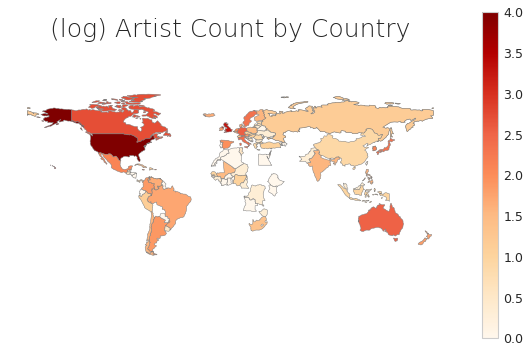

In [32]:
vmin, vmax = 0, 4

fig, ax = plt.subplots(1, figsize=(10, 6))

new_world_df.plot(column='artist_count', cmap='OrRd', linewidth=0.5, ax=ax, edgecolor='0.5')

ax.axis('off')

ax.set_title('(log) Artist Count by Country', fontdict={'fontsize': '25', 'fontweight' : '3'}, pad=50)

# ax.annotate('Source: Spotify API, 2019',xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')

sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)

In [34]:
fig.savefig('images/artist count by country.png')

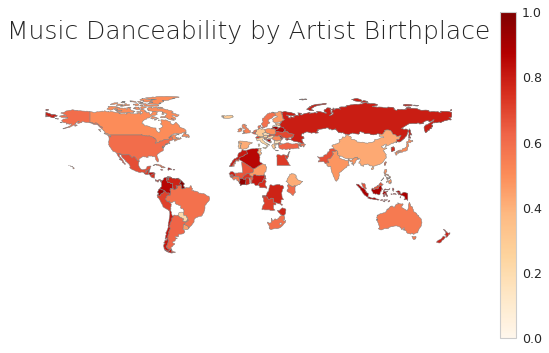

In [21]:
vmin, vmax = 0, 1

fig, ax = plt.subplots(1, figsize=(10, 6))

new_world_df.plot(column='danceability', cmap='OrRd', linewidth=0.5, ax=ax, edgecolor='0.5')

ax.axis('off')

ax.set_title('Music Danceability by Artist Birthplace', fontdict={'fontsize': '25', 'fontweight' : '3'}, pad=50)

# ax.annotate('Source: Spotify API, 2019',xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')

sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)

In [24]:
fig.savefig('danceability vs birthplace.png')

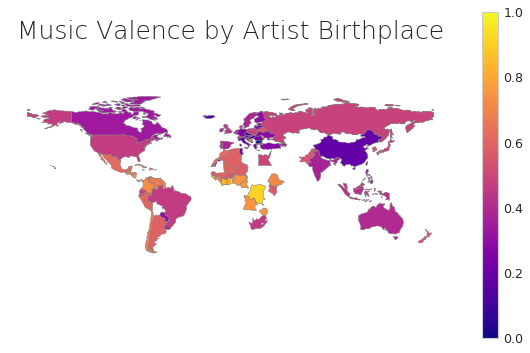

In [22]:
vmin, vmax = 0, 1

fig, ax = plt.subplots(1, figsize=(10, 6))

new_world_df.plot(column='valence', cmap='plasma', linewidth=0.5, ax=ax, edgecolor='0.5')

ax.axis('off')

ax.set_title('Music Valence by Artist Birthplace', fontdict={'fontsize': '25', 'fontweight' : '3'}, pad=50)

# ax.annotate('Source: Spotify API, 2019',xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')

sm = plt.cm.ScalarMappable(cmap='plasma', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)

In [25]:
fig.savefig('images/valence vs birthplace.png')

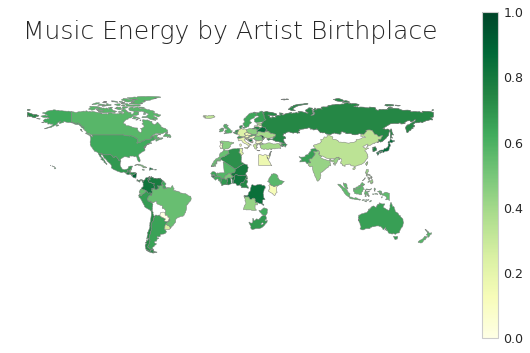

In [23]:
vmin, vmax = 0, 1

fig, ax = plt.subplots(1, figsize=(10, 6))

new_world_df.plot(column='energy', cmap='YlGn', linewidth=0.5, ax=ax, edgecolor='0.5')

ax.axis('off')

ax.set_title('Music Energy by Artist Birthplace', fontdict={'fontsize': '25', 'fontweight' : '3'}, pad=50)

# ax.annotate('Source: Spotify API, 2019',xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')

sm = plt.cm.ScalarMappable(cmap='YlGn', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)

In [26]:
fig.savefig('images/energyvs birthplace.png')